
# <center><b>**1009_GCD- Capstone_Project _EDA**<center><b>


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>**5.** [**Examine the Data**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
  - **6.1** [**Missing Values & Correction in Department**](#Section6.1)<br>

  - **6.2** [**Missing values in Last_Evaluation**](#Section6.2)<br>
  - **6.3** [**MMissing Values in Filed Commplaint ,recently_promoted**](#Section6.3)<br>
  - **6.4** [**Merging of all Datasets**](#Section6.4)<br>
  - **6.5** [**Missing Values in Tenure & satisfaction**](#Section6.5)<br>
   
             
**7.** [**Exploratory Data Analysis on Final Data**](#Section7)<br>

   - **Q1** [**Distribution of Employees across gender**](#SectionQ1)<br>
   - **Q2** [**Distribution of employees across Departments.**](#SectionQ2)<br>
   - **Q3** [**Distribution of departments across gender.**](#SectionQ3)<br>
   - **Q4** [**Distribution of Employees across departments vs salary**](#SectionQ4)<br>
   - **Q5** [**Distribution of Employees across Age and Tenure**](#SectionQ5)<br>
   - **Q6** [**Distribution of employees across employee status vs Marital Status**](#SectionQ6)<br>
   - **Q7** [**Distribution of Employees across gender vs salary**](#SectionQ7)<br>
   - **Q8** [**Distribution of Employees across gender vs recently promoted**](#SectionQ8)<br>
   - **Q9** [**Distribution of employee across tenure Vs status**](#SectionQ9)<br>
   - **Q10** [**Q10.Impact of projects on status of the employee.**](#SectionQ10)<br>
 
**8** [**One Hot Encoding and Label Encoding**](#Section8)<br>
**9** [**Conclusion FROM EDA**](#Section9)<br>
**10** [**Model Building**](#Section10)<br>

<a name = Section1></a>
### **1.Introduction**
The Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of  workforce diminishes over time. 
This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Companies are struggling to address today and this situation shall continue to be there for one simple reason: 
the companies don’t really understand why their employees are leaving in the first place.

Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving.
The HR Department then tries and learns insights from the interview and makes changes accordingly.

This suffers from the following problems:

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

<a name = Section2></a>
### **2.Problem Statement**


Our client for this project is the HR Department at a software company.

- HR want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

Hr Department have given three datasets that contain information about past employees and their status (still employed or already left).
Our task is to build a classification model using the datasets.Because there is no machine learning model for this problem in the company.

<a name = Section3></a>
### **3. Installing & Importing Libraries**

In [15]:
# !pip install -q datascience                                         # A package that is required by pandas-profiling library
# !pip install -q pandas-profiling                                 # A library to generate basic statistics about data
# !pip install MySQL-connector-python

In [16]:
# !pip install -q --upgrade pandas-profiling

In [17]:
import pandas as pd
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import folium


<a name = Section4></a>
### **4. Data Acquisition & Description**

Three datasets that contain information about past employees and their status (still employed or already left).

**department_data**

This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code
- dept_name – Name of the Department
- dept_head – Name of the Head of the Department

**employee_details_data**

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

**employee_data**

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target variable**

- status – Current employment status (Employed / Left)

**Administrative information**

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

**Workload information**

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month

**Mutual evaluation information**

- satisfaction – Score for employee’s satisfaction with the company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?

**Extracting Data From SQL Database**

In [18]:
# # Importing MYSQL connector
# import mysql.connector


# mydb = mysql.connector.connect(
#      host ='cpanel.insaid.co',
#      user = 'student',
#      password ='student',
# database='Capstone2',
#     auth_plugin='mysql_native_password',
    
# )


In [19]:
# # Acquiring employee_details_data dataset from MYSQL database
# sql_query = pd.read_sql_query('select * from employee_details_data',mydb) 
# df = pd.DataFrame(sql_query)
# df.to_csv (r'C:\Users\Administrator\Desktop\Data Science\INSAID\GCD-Capstone\employee_details_data.csv', index = False) 

In [20]:
# # Acquiring department_data dataset from MYSQL database
# sql_query = pd.read_sql_query('select * from department_data',mydb)
# df = pd.DataFrame(sql_query)
# df.to_csv(r'C:\Users\Administrator\Desktop\Data Science\INSAID\GCD-Capstone\department_data.csv', index = False) 

In [21]:
# # Acquiring employee_data dataset from MYSQL database
# sql_query = pd.read_sql_query('select * from employee_data',mydb) 
# df = pd.DataFrame(sql_query)
# df.to_csv (r'C:\Users\Administrator\Desktop\Data Science\INSAID\GCD-Capstone\employee_data.csv', index = False) 

**Data Acquisition**

In [22]:
department_data = pd.read_csv("/content/department_data.csv")
employee_data = pd.read_csv("/content/employee_data.csv")
emp_details_data = pd.read_csv("/content/employee_details_data.csv")

<a name = Section5></a>
### **5. Examine the Data**

In [23]:
print("Shape of Department Data : " , department_data.shape)
print("Shape of Employee data : " , employee_data.shape)
print("Shape of Employee details data : ", emp_details_data.shape)

Shape of Department Data :  (11, 3)
Shape of Employee data :  (14150, 11)
Shape of Employee details data :  (14245, 4)


In [24]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [25]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [26]:
emp_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [27]:
employee_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.00000,2046.00000,12663.00000,14150.00000,297.00000,14000.00000,14000.00000,14150.00000
mean,199.99435,1.00000,0.71840,3.77830,1.00000,0.62121,3.49936,112080.75025
std,50.83370,0.00000,0.17311,1.25016,0.00000,0.25048,1.46258,8748.20286
min,49.00000,1.00000,0.31617,1.00000,1.00000,0.04006,2.00000,0.00000
25%,155.00000,1.00000,0.56371,3.00000,1.00000,0.45036,3.00000,105772.50000
50%,199.00000,1.00000,0.72473,4.00000,1.00000,0.65239,3.00000,111291.50000
75%,245.00000,1.00000,0.87141,5.00000,1.00000,0.82493,4.00000,116650.75000
max,310.00000,1.00000,1.00000,7.00000,1.00000,1.00000,10.00000,148988.00000


In [28]:
emp_details_data.describe()

,employee_id,age
count,14245.00000,14245.00000
mean,112123.05054,32.88993
std,8500.45734,9.97083
min,100101.00000,22.00000
25%,105775.00000,24.00000
50%,111298.00000,29.00000
75%,116658.00000,41.00000
max,148988.00000,57.00000


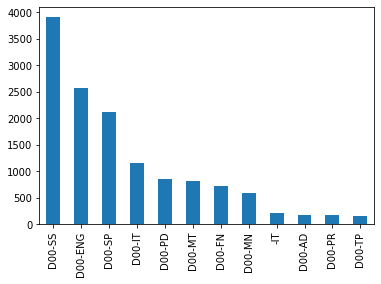

In [29]:
employee_data['department'].value_counts().plot(kind='bar')

**We can observe from above plot that , more employees belog to the sales department**

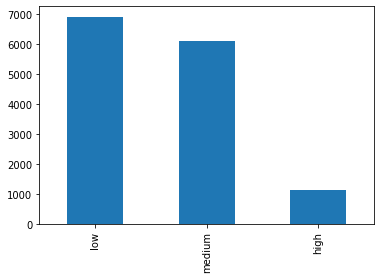

In [30]:
employee_data['salary'].value_counts().plot(kind='bar')

**Most of the employees having low salary compare to other employees**

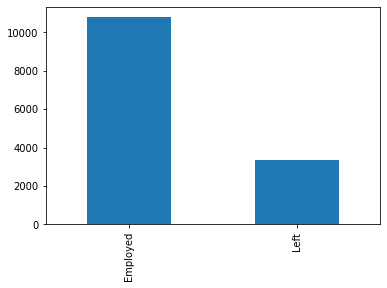

In [31]:
employee_data['status'].value_counts().plot(kind='bar')

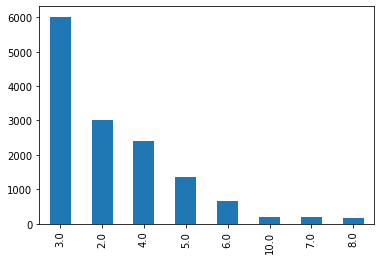

In [32]:
employee_data['tenure'].value_counts().plot(kind='bar')

**The employees who are complted tenure 3 yrs are more in company**

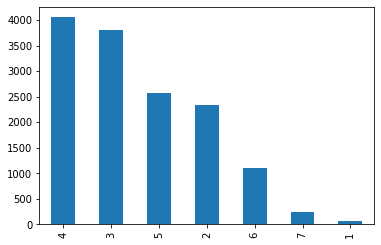

In [33]:
employee_data['n_projects'].value_counts().plot(kind='bar')

**The employees in the company who have completed 4 projects are more in numbers.** 

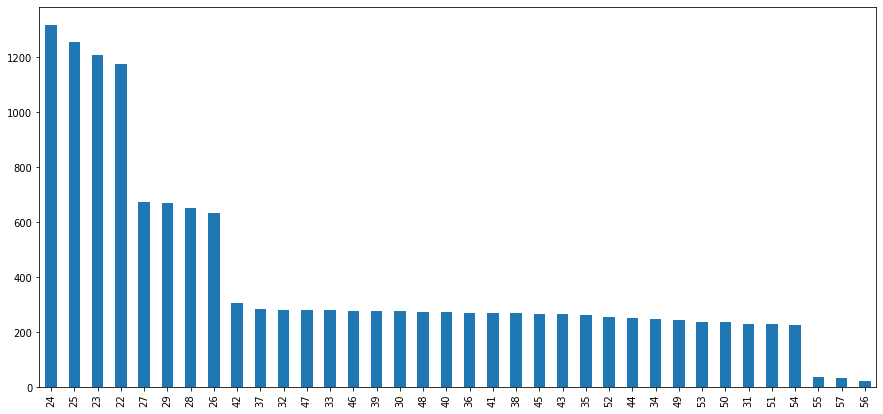

In [34]:
fig = plt.figure(figsize = [15,7])
emp_details_data['age'].value_counts().plot(kind='bar')

**Around 80% of the headcount,we can see more of younger generations are working in the company.**

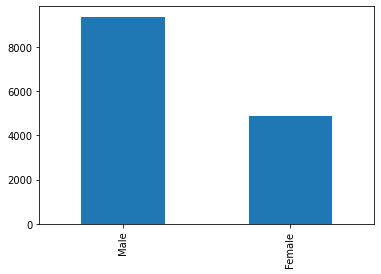

In [35]:
emp_details_data['gender'].value_counts().plot(kind = 'bar')

**Male employees are more in numbers compare to female employees.**

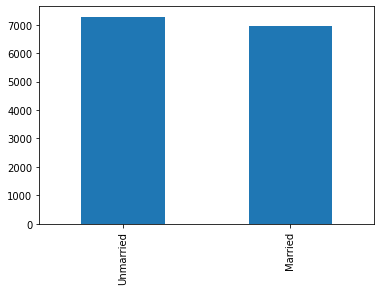

In [36]:
emp_details_data['marital_status'].value_counts().plot(kind='bar')

**Marital status is almost equal in numbers.**

In [37]:
employee_data['avg_monthly_hrs'].value_counts().sort_values(ascending = False).head(10)

135.00000    144
156.00000    141
151.00000    140
149.00000    139
145.00000    125
143.00000    124
160.00000    123
148.00000    119
260.00000    118
154.00000    118
Name: avg_monthly_hrs, dtype: int64

In [38]:
department_data['dept_name']

0              IT
1           Sales
2            Temp
3     Engineering
4         Support
5         Finance
6     Procurement
7           Admin
8      Management
9       Marketing
10        Product
Name: dept_name, dtype: object

In [39]:
department_data['dept_head']

0                Henry Adey
1           Edward J Bayley
2           Micheal Zachrey
3     Sushant Raghunathan K
4            Amelia Westray
5                 Aanchal J
6               Louie Viles
7             Evelyn Tolson
8             Ellie Trafton
9              Reuben Swann
10            Darcy Staines
Name: dept_head, dtype: object

In [40]:
def missing(df):
    null_columns= pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()*100/df.shape[0], columns = ['Percentage-of-NaN-values'])
    null_columns['Total_NaN_Values'] = df[df.columns[df.isnull().any()]].isnull().sum()
    return null_columns

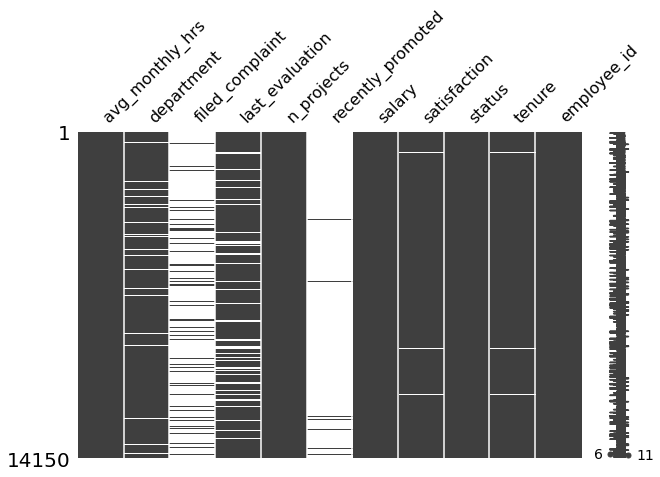

In [41]:
import missingno as mno
mno.matrix(employee_data, figsize = (10,6))
plt.show()

In [42]:
missing(employee_data)

,Percentage-of-NaN-values,Total_NaN_Values
department,4.99647,707
filed_complaint,85.54064,12104
last_evaluation,10.50883,1487
recently_promoted,97.90106,13853
satisfaction,1.06007,150
tenure,1.06007,150


In [43]:
missing(department_data)

,Percentage-of-NaN-values,Total_NaN_Values


In [44]:
missing(emp_details_data)

,Percentage-of-NaN-values,Total_NaN_Values


**Observations**

- Total observations are **14150** and 11 features in **Employee Data**.
- **13853** records having **null values** in **Recently promoted** column.
- **12104** records having null values in **filed_complaint** column.
- **1487** records having null values in **last evaluation** column.
-**707** records having null values in **Department** column.
- For **Tenure and satisfaction** column, **150** records having **null values**.
- No null values in **emp_details_data and Department_data**.

<a name = Section6></a>
### **6. Data Cleaning**

<a name = Section6.1></a>
**6.1. Missing Values & Correction in Department**

In [45]:
employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [46]:
# Correction in Department ID (-IT to D00-IT )
employee_data.replace({'-IT'},{'D00-IT'},inplace =True)

In [47]:
employee_data[employee_data['department'].isnull()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00000,NaN,NaN,0.86684,6,NaN,medium,0.13442,Left,4.00000,124467
1,134.00000,NaN,NaN,0.55572,2,NaN,low,0.51104,Left,3.00000,112210
25,155.00000,NaN,NaN,0.46460,2,NaN,medium,0.41445,Left,3.00000,127792
28,156.00000,NaN,NaN,NaN,2,NaN,medium,0.46575,Left,3.00000,128509
40,233.00000,NaN,NaN,0.96538,5,NaN,medium,0.96231,Left,5.00000,125077


**We can consider null value present in Department as Unknown Department and will replace the null value with D00-UN.**

In [48]:
employee_data['department'] = np.where(employee_data['department'].isna(),'D00-UN',employee_data['department'])

In [49]:
# employee_data = employee_data.drop(['filed_complaint','recently_promoted'], axis = 1)

In [50]:
# columns = ['last_evaluation','satisfaction','tenure']
# for i in columns:
#     employee_data[i] = employee_data[i].replace(np.NaN , employee_data[i].median())

<a name = Section6.2></a>
**6.2. Missing values in Last_Evaluation**

In [51]:
employee_data[employee_data['last_evaluation'].isnull()].head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
21,127.00000,D00-ENG,NaN,NaN,2,NaN,low,0.37051,Left,3.00000,114322
28,156.00000,D00-UN,NaN,NaN,2,NaN,medium,0.46575,Left,3.00000,128509
39,154.00000,D00-SP,NaN,NaN,2,1.00000,medium,0.44015,Left,3.00000,110293
44,125.00000,D00-TP,NaN,NaN,3,NaN,medium,NaN,Left,NaN,120360
49,159.00000,D00-ENG,NaN,NaN,2,NaN,high,0.37598,Left,3.00000,111951


**We can replace the missing values with mean values of the respective departments.**

In [52]:
mean = employee_data.groupby(['department'])['last_evaluation'].mean()
mean_deprt = mean.to_dict()

In [53]:
mean

department
D00-AD    0.72619
D00-ENG   0.72265
D00-FN    0.72501
D00-IT    0.71979
D00-MN    0.72920
D00-MT    0.71481
D00-PD    0.71996
D00-PR    0.69920
D00-SP    0.72261
D00-SS    0.71101
D00-TP        NaN
D00-UN    0.71793
Name: last_evaluation, dtype: float64

In [54]:
mean_deprt

{'D00-AD': 0.7261866274509804,
 'D00-ENG': 0.722654646378054,
 'D00-FN': 0.7250126907993967,
 'D00-IT': 0.7197928795081968,
 'D00-MN': 0.7292006194029851,
 'D00-MT': 0.7148054221311475,
 'D00-PD': 0.7199604790575916,
 'D00-PR': 0.699204608974359,
 'D00-SP': 0.7226072768746723,
 'D00-SS': 0.7110102268128161,
 'D00-TP': nan,
 'D00-UN': 0.717932600624025}

**Mapping last evaluation column with mean of the respective department to fill the NaN values.**

In [55]:
employee_data['last_evaluation'] = employee_data['last_evaluation'].fillna(employee_data['department'].map(mean_deprt))

In [56]:
# Replacing the NaN value present in 'last_evaluation' column of department ID: D00-TP with Zeros(0)
employee_data['last_evaluation'] = employee_data['last_evaluation'].fillna(0)

<a name = Section6.3></a>
**6.3. Missing Values in Filed Commplaint ,recently_promoted** 

In [57]:
employee_data['filed_complaint'].value_counts()

1.00000    2046
Name: filed_complaint, dtype: int64

**From above we observe that 1 indicates the employee has given complaint.
So the remaining data means employees have not given complaint. 
Hence instead of removing the column ,we will replace the NAN values with zero for better analysis.**

In [58]:
employee_data['filed_complaint'] = employee_data['filed_complaint'].fillna(0)

In [59]:
employee_data['recently_promoted'].value_counts()

1.00000    297
Name: recently_promoted, dtype: int64

**From above we observe that 1 indicates the employee has been promoted and which means rest of the employee is not promoted yet. Hence we will replace the NAN values with zero.**

In [60]:
employee_data['recently_promoted'] = employee_data['recently_promoted'].fillna(0)

<a name = Section6.4></a>
**6.4. Merging Datasets**

**To fill the NaN values in tenure and satisfaction column we need to cross check with the age and marital status of the employee for better understanding.Hence we will merge the datasets.**

In [61]:
df1 = employee_data.merge(emp_details_data , on = 'employee_id')

In [62]:
df1.shape

(14145, 14)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   department         14145 non-null  object 
 2   filed_complaint    14145 non-null  float64
 3   last_evaluation    14145 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  14145 non-null  float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  float64
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [64]:
df1.head(1)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.00000,D00-UN,0.00000,0.86684,6,0.00000,medium,0.13442,Left,4.00000,124467,42,Female,Married


In [65]:
department_data.head(1)

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey


In [66]:
#Renaming the column dept_id to department for merging datasets.
department_data.rename(columns = {'dept_id':'department'}, inplace = True)

In [67]:
department_data.head(1)

,department,dept_name,dept_head
0,D00-IT,IT,Henry Adey


In [68]:
df = df1.merge(department_data , on = 'department',how ='left')

In [69]:
df.shape

(14145, 16)

In [70]:
df.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction         150
status                 0
tenure               150
employee_id            0
age                    0
gender                 0
marital_status         0
dept_name            706
dept_head            706
dtype: int64

In [71]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.00000,D00-UN,0.00000,0.86684,6,0.00000,medium,0.13442,Left,4.00000,124467,42,Female,Married,NaN,NaN
1,134.00000,D00-UN,0.00000,0.55572,2,0.00000,low,0.51104,Left,3.00000,112210,23,Female,Unmarried,NaN,NaN
2,156.00000,D00-SS,1.00000,0.47408,2,0.00000,medium,0.40510,Left,3.00000,126150,24,Female,Unmarried,Sales,Edward J Bayley
3,256.00000,D00-SP,0.00000,0.96136,6,0.00000,low,0.15297,Left,4.00000,125346,51,Female,Married,Support,Amelia Westray
4,146.00000,D00-SS,0.00000,0.50735,2,0.00000,medium,0.43484,Left,3.00000,113707,23,Female,Unmarried,Sales,Edward J Bayley


**After merging datasets we observe that tenure and satisfaction column have 150 NaN values . dept_name & dept_head column have 706 Nan values because of D00-UN(unknow department) department .**

In [72]:
df[df['department']=='D00-UN'][:10]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.00000,D00-UN,0.00000,0.86684,6,0.00000,medium,0.13442,Left,4.00000,124467,42,Female,Married,NaN,NaN
1,134.00000,D00-UN,0.00000,0.55572,2,0.00000,low,0.51104,Left,3.00000,112210,23,Female,Unmarried,NaN,NaN
25,155.00000,D00-UN,0.00000,0.46460,2,0.00000,medium,0.41445,Left,3.00000,127792,23,Female,Unmarried,NaN,NaN
28,156.00000,D00-UN,0.00000,0.71793,2,0.00000,medium,0.46575,Left,3.00000,128509,25,Female,Unmarried,NaN,NaN
39,233.00000,D00-UN,0.00000,0.96538,5,0.00000,medium,0.96231,Left,5.00000,125077,22,Female,Unmarried,NaN,NaN
42,260.00000,D00-UN,0.00000,1.00000,5,0.00000,low,0.80846,Left,5.00000,128184,23,Female,Unmarried,NaN,NaN
70,153.00000,D00-UN,0.00000,0.71793,2,0.00000,low,0.45510,Left,3.00000,121337,25,Female,Unmarried,NaN,NaN
71,294.00000,D00-UN,0.00000,0.58770,3,0.00000,low,0.76039,Left,4.00000,119768,22,Female,Unmarried,NaN,NaN
133,246.00000,D00-UN,0.00000,0.88409,6,0.00000,medium,0.13151,Left,4.00000,115133,34,Female,Married,NaN,NaN
154,140.00000,D00-UN,0.00000,0.53096,2,0.00000,medium,0.43994,Left,3.00000,111673,24,Female,Unmarried,NaN,NaN


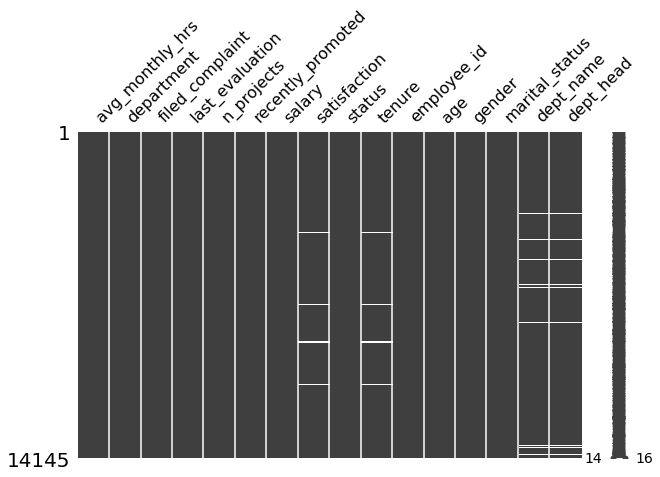

In [73]:
import missingno as mno
mno.matrix(df, figsize = (10,6))
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   department         14145 non-null  object 
 2   filed_complaint    14145 non-null  float64
 3   last_evaluation    14145 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  14145 non-null  float64
 6   salary             14145 non-null  object 
 7   satisfaction       13995 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             13995 non-null  float64
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_name          13439 non-null  object 
 15  dept_head          13439 non-null  object 
dtypes: float64(6), int64(3

In [75]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,14145.00000,14145.00000,14145.00000,14145.00000,14145.00000,13995.00000,13995.00000,14145.00000,14145.00000
mean,199.98706,0.14464,0.71081,3.77794,0.02100,0.62130,3.49932,112120.36875,32.89862
std,50.82824,0.35175,0.17953,1.24993,0.14338,0.25044,1.46281,8492.09939,9.97894
min,49.00000,0.00000,0.00000,1.00000,0.00000,0.04006,2.00000,100101.00000,22.00000
25%,155.00000,0.00000,0.57276,3.00000,0.00000,0.45039,3.00000,105780.00000,24.00000
50%,199.00000,0.00000,0.71996,4.00000,0.00000,0.65245,3.00000,111296.00000,29.00000
75%,245.00000,0.00000,0.85705,5.00000,0.00000,0.82496,4.00000,116653.00000,41.00000
max,310.00000,1.00000,1.00000,7.00000,1.00000,1.00000,10.00000,148988.00000,57.00000


In [76]:
df.shape

(14145, 16)

**Observation**

- After merging the datasets we have got **16 features and 14145 observations**
- There are **150 NaN values** in **tenure and satisfaction** columns.
- There are **706 Nan Values** in **department head and department name** columns.
- The max monthly hours worked by employees is **310 hours** and minimum is **49 hours**
-The maximum projects worked by employees is 7 and minimum project is 1.
-The **max age** of an employee in the company is of **57 years and minimum age is 22 years**.
- There 11 departments in the company .


<a name = Section6.5></a>
**6.5. Missing Values in Tenure & satisfaction**

In [77]:
df[df['tenure'].isnull()].head(2)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
43,125.00000,D00-TP,0.00000,0.00000,3,0.00000,medium,NaN,Left,NaN,120360,24,Female,Unmarried,Temp,Micheal Zachrey
244,124.00000,D00-TP,0.00000,0.00000,3,0.00000,low,NaN,Left,NaN,116012,25,Female,Unmarried,Temp,Micheal Zachrey


In [78]:
df['tenure'].value_counts()

3.00000     6016
2.00000     3023
4.00000     2391
5.00000     1369
6.00000      660
10.00000     201
7.00000      180
8.00000      155
Name: tenure, dtype: int64

In [79]:
# Replacing the NaN values in tenure with '1' to extraxt the information for the missing value
df['tenure'] = df['tenure'].replace(np.NaN,1)

In [80]:
tenure_1 = df[df['tenure'] == 1]
tenure_1.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
43,125.00000,D00-TP,0.00000,0.00000,3,0.00000,medium,NaN,Left,1.00000,120360,24,Female,Unmarried,Temp,Micheal Zachrey
244,124.00000,D00-TP,0.00000,0.00000,3,0.00000,low,NaN,Left,1.00000,116012,25,Female,Unmarried,Temp,Micheal Zachrey
250,119.00000,D00-TP,0.00000,0.00000,2,0.00000,medium,NaN,Left,1.00000,116287,22,Female,Unmarried,Temp,Micheal Zachrey
413,126.00000,D00-TP,0.00000,0.00000,2,0.00000,low,NaN,Left,1.00000,115235,24,Female,Unmarried,Temp,Micheal Zachrey
467,65.00000,D00-TP,0.00000,0.00000,1,0.00000,high,NaN,Left,1.00000,122769,24,Female,Unmarried,Temp,Micheal Zachrey


In [81]:
tenure_1['age'].value_counts()

25    27
23    27
24    25
22    19
26    16
29    14
27    14
28     7
49     1
Name: age, dtype: int64

In [82]:
tenure_1['marital_status'].value_counts()

Unmarried    149
Married        1
Name: marital_status, dtype: int64

In [83]:
tenure_1['department'].value_counts()

D00-TP    150
Name: department, dtype: int64

From the above information, we can infer that **150 observations** of null value in **Tenure** column are,

- **All belong to same department ie.Temporary**
- **149 are Unmarried**
- **All are Young age group, hence considered as experience of less than a year and therefore imputing with value '1' is justified.**

In [84]:
df[df['satisfaction'].isnull()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
43,125.00000,D00-TP,0.00000,0.00000,3,0.00000,medium,NaN,Left,1.00000,120360,24,Female,Unmarried,Temp,Micheal Zachrey
244,124.00000,D00-TP,0.00000,0.00000,3,0.00000,low,NaN,Left,1.00000,116012,25,Female,Unmarried,Temp,Micheal Zachrey
250,119.00000,D00-TP,0.00000,0.00000,2,0.00000,medium,NaN,Left,1.00000,116287,22,Female,Unmarried,Temp,Micheal Zachrey
413,126.00000,D00-TP,0.00000,0.00000,2,0.00000,low,NaN,Left,1.00000,115235,24,Female,Unmarried,Temp,Micheal Zachrey
467,65.00000,D00-TP,0.00000,0.00000,1,0.00000,high,NaN,Left,1.00000,122769,24,Female,Unmarried,Temp,Micheal Zachrey
728,139.00000,D00-TP,0.00000,0.00000,1,0.00000,medium,NaN,Left,1.00000,123723,24,Female,Unmarried,Temp,Micheal Zachrey
778,63.00000,D00-TP,0.00000,0.00000,1,0.00000,medium,NaN,Left,1.00000,120313,23,Female,Unmarried,Temp,Micheal Zachrey
912,72.00000,D00-TP,0.00000,0.00000,1,0.00000,medium,NaN,Left,1.00000,111561,22,Female,Unmarried,Temp,Micheal Zachrey
929,87.00000,D00-TP,0.00000,0.00000,2,0.00000,medium,NaN,Left,1.00000,115104,23,Female,Unmarried,Temp,Micheal Zachrey
992,68.00000,D00-TP,1.00000,0.00000,1,0.00000,low,NaN,Left,1.00000,129361,25,Female,Unmarried,Temp,Micheal Zachrey


- **All 150 Missing vaues belong to tenure=1 category**
- **We can replace the missing values with '0' because these rows belongs to the newly recruited employees.**

In [85]:
df['satisfaction'] = df['satisfaction'].fillna(0)

In [86]:
#Changing the dtype 
df = df.astype({'filed_complaint':'int64','recently_promoted':'int64','tenure':'int64' })

In [87]:
df['dept_name'].value_counts()

Sales          3904
Engineering    2573
Support        2112
IT             1364
Product         855
Marketing       815
Finance         725
Management      593
Admin           175
Procurement     173
Temp            150
Name: dept_name, dtype: int64

**As we do not know about the department name , department head for these employes , we will fill NaN values with Unknown.**

In [88]:
df['dept_name']= df['dept_name'].fillna('Unknown')
df['dept_head'] = df['dept_head'].fillna('Unknown')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14145 non-null  float64
 1   department         14145 non-null  object 
 2   filed_complaint    14145 non-null  int64  
 3   last_evaluation    14145 non-null  float64
 4   n_projects         14145 non-null  int64  
 5   recently_promoted  14145 non-null  int64  
 6   salary             14145 non-null  object 
 7   satisfaction       14145 non-null  float64
 8   status             14145 non-null  object 
 9   tenure             14145 non-null  int64  
 10  employee_id        14145 non-null  int64  
 11  age                14145 non-null  int64  
 12  gender             14145 non-null  object 
 13  marital_status     14145 non-null  object 
 14  dept_name          14145 non-null  object 
 15  dept_head          14145 non-null  object 
dtypes: float64(3), int64(6

**Observations**

- After preprocessing of data, we have got pure dataset for EDA process. 
- There are **16 features with 14145 observations** in dataset.
- There are **no missing values** present in the dataset.


In [90]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head
0,246.00000,D00-UN,0,0.86684,6,0,medium,0.13442,Left,4,124467,42,Female,Married,Unknown,Unknown
1,134.00000,D00-UN,0,0.55572,2,0,low,0.51104,Left,3,112210,23,Female,Unmarried,Unknown,Unknown
2,156.00000,D00-SS,1,0.47408,2,0,medium,0.40510,Left,3,126150,24,Female,Unmarried,Sales,Edward J Bayley
3,256.00000,D00-SP,0,0.96136,6,0,low,0.15297,Left,4,125346,51,Female,Married,Support,Amelia Westray
4,146.00000,D00-SS,0,0.50735,2,0,medium,0.43484,Left,3,113707,23,Female,Unmarried,Sales,Edward J Bayley


<a name = Section7></a>
# **7. Exploratory Data Analysis**

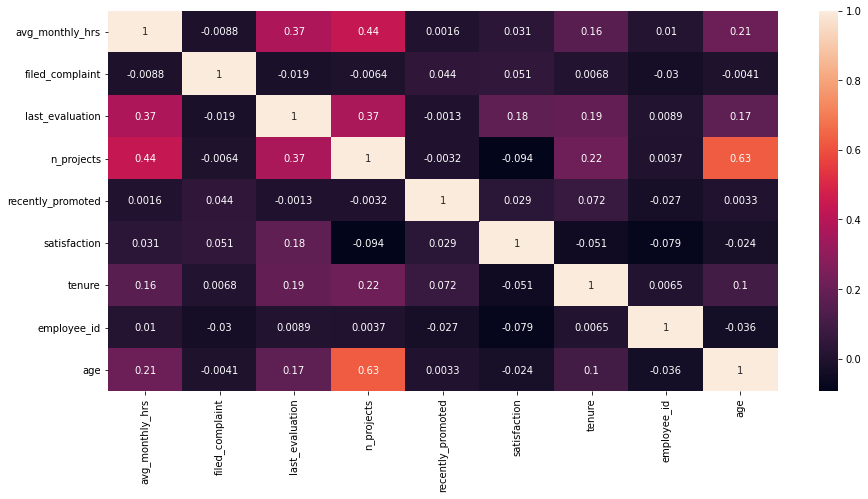

In [91]:
fig = plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot = True)

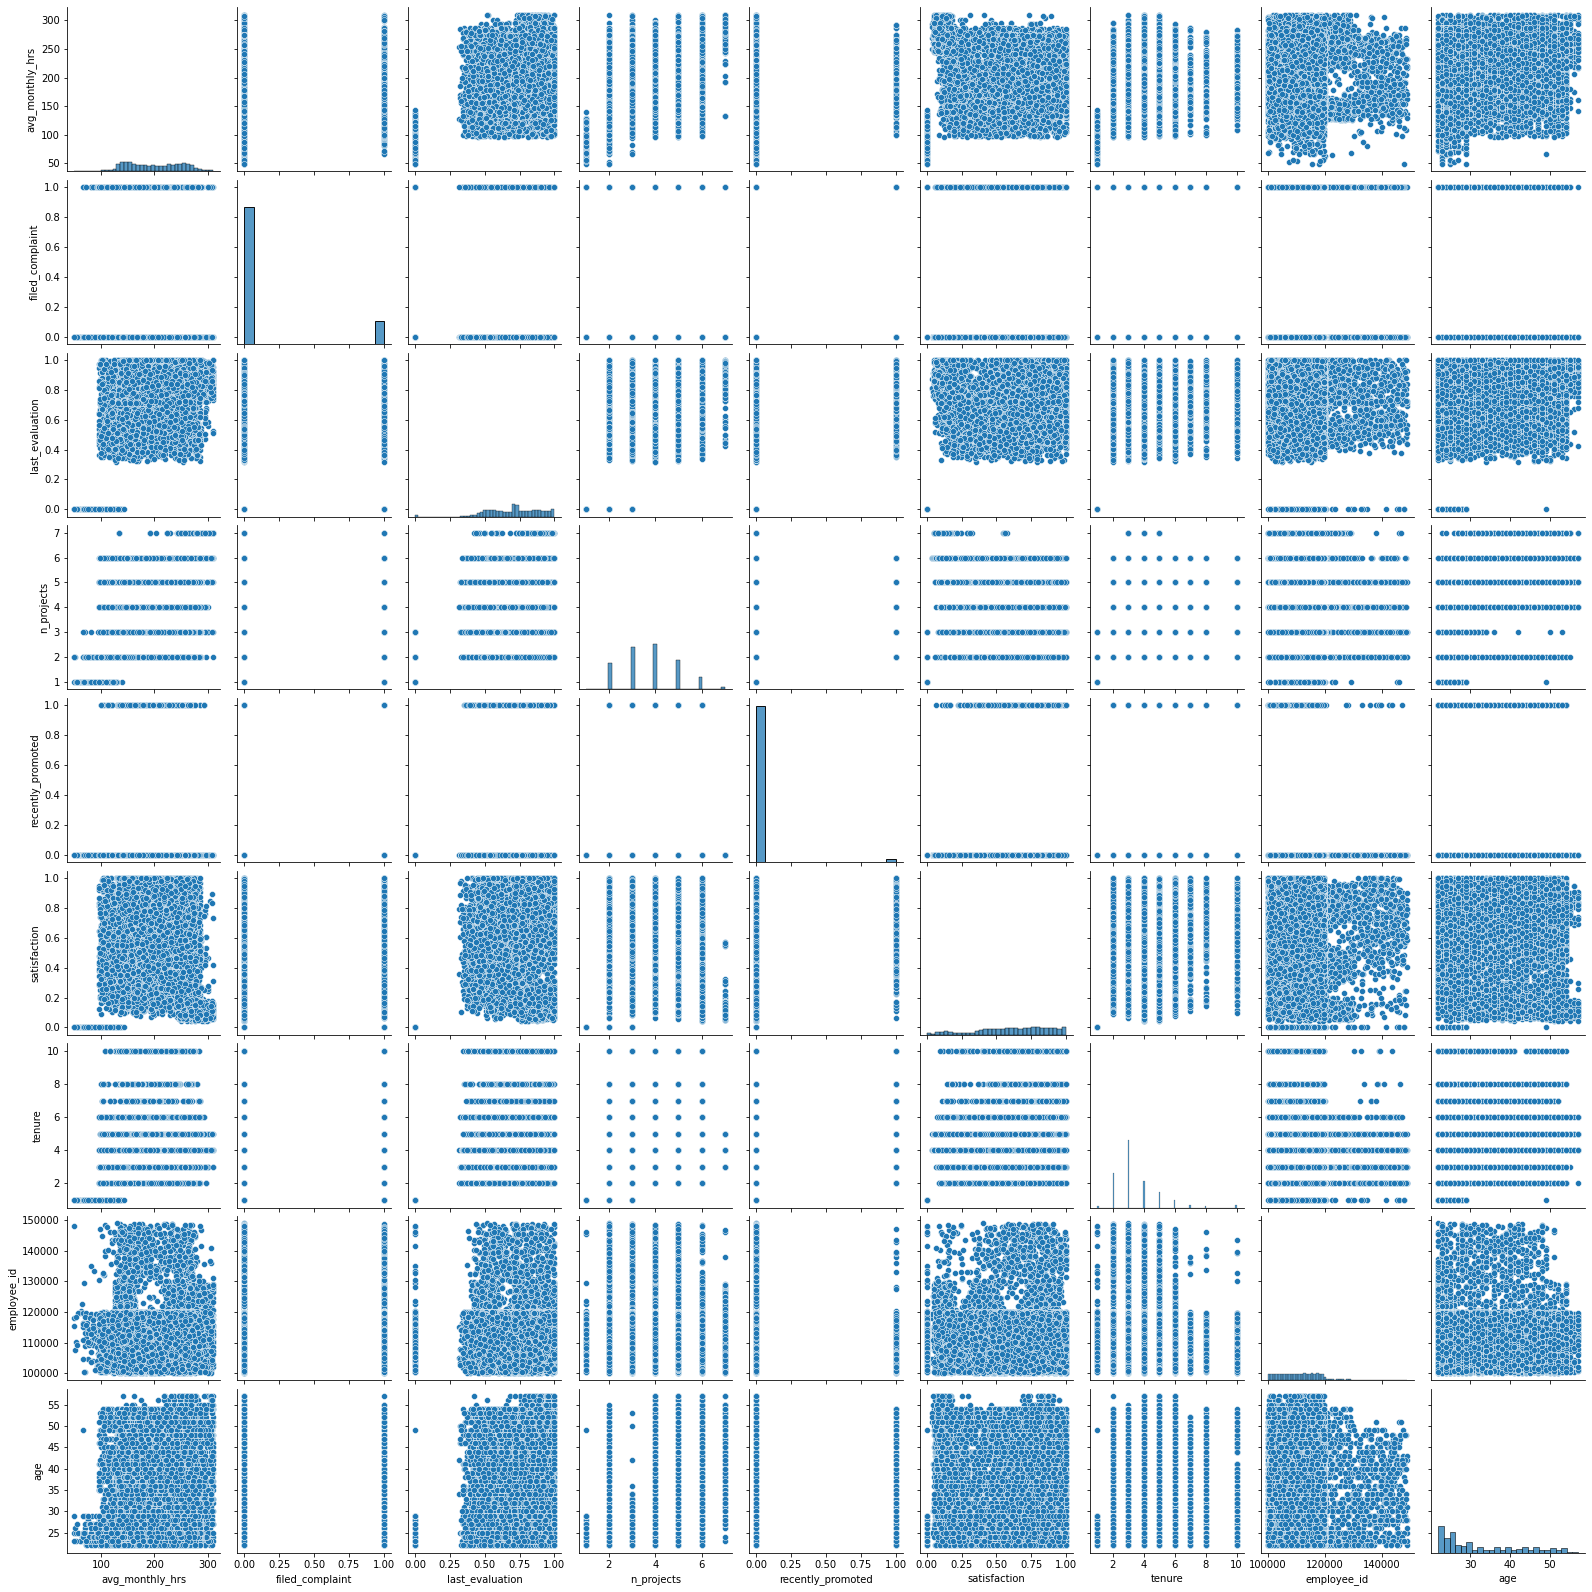

In [92]:
sns.pairplot(df)

<a name = SectionQ1></a>
### **Q1.Distribution of Employees across gender.**

In [93]:
gender = df.groupby(['gender'])['employee_id'].count()
gender

gender
Female    4841
Male      9304
Name: employee_id, dtype: int64

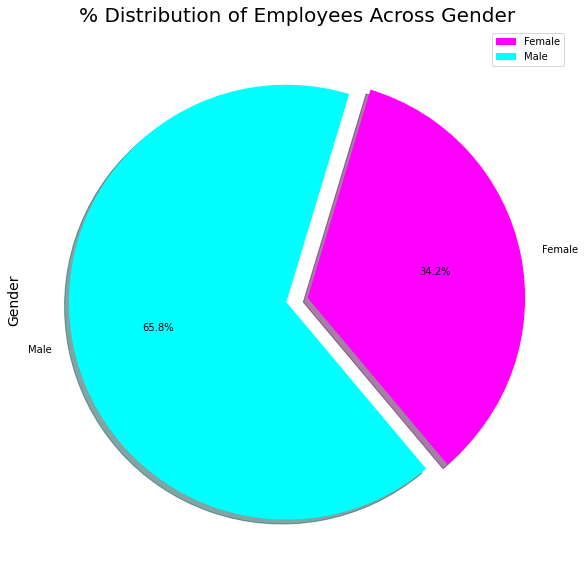

In [94]:
gender.plot(kind ='pie',figsize = [10,10],explode = [0.05,0.05],shadow = True ,autopct= '%3.1f%%',legend=True,cmap='cool_r',startangle=310)

plt.ylabel("Gender",fontsize=14)
plt.title("% Distribution of Employees Across Gender",fontsize=20)
plt.show()

**Company have more Males employees(66.8%) compare to female employees(34.2%) across 11 departments.** 

<a name = SectionQ2></a>
### **Q2.Distribution of employees across Departments.**

In [95]:
emp = df.groupby(['dept_name'])['employee_id'].count()
emp

dept_name
Admin           175
Engineering    2573
Finance         725
IT             1364
Management      593
Marketing       815
Procurement     173
Product         855
Sales          3904
Support        2112
Temp            150
Unknown         706
Name: employee_id, dtype: int64

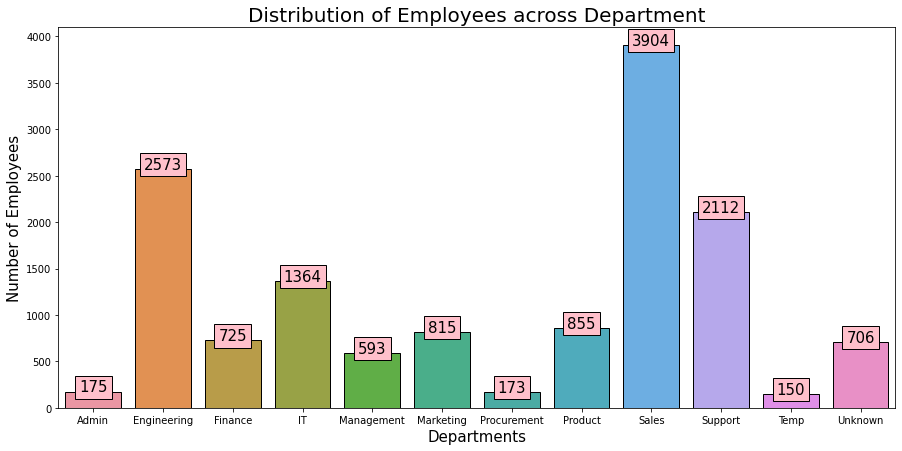

In [96]:
fig = plt.figure(figsize = [15,7])

x = emp.index
y = emp.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize = 15 ,horizontalalignment = 'center', color = 'black' ,Bbox = dict(facecolor = 'pink', alpha = 1))

sns.barplot(x,y, edgecolor='black')

addlabels(x,y)

plt.ylabel("Number of Employees",fontsize=15)
plt.xlabel("Departments",fontsize=15)
plt.title("Distribution of Employees across Department",fontsize=20)
plt.show()

**We can see from above plot that , more employees are in sales , engineering and support department**

<a name = SectionQ3></a>
### **Q3.Distribution of departments across gender.**

In [97]:
df.groupby(['gender','dept_name'])['employee_id'].nunique()


gender  dept_name  
Female  Admin            55
        Engineering     880
        Finance         236
        IT              493
        Management      196
        Marketing       271
        Procurement      55
        Product         285
        Sales          1361
        Support         700
        Temp             44
        Unknown         253
Male    Admin           120
        Engineering    1693
        Finance         486
        IT              866
        Management      394
        Marketing       541
        Procurement     118
        Product         568
        Sales          2534
        Support        1408
        Temp            106
        Unknown         453
Name: employee_id, dtype: int64

In [98]:
dept = pd.DataFrame(df.groupby(['gender','dept_name'])['employee_id'].count())
dept.reset_index(level = [0,1] , inplace = True)
dept.rename(columns = {'employee_id': 'employee_count'} , inplace = True)
dept.head(10)

,gender,dept_name,employee_count
0,Female,Admin,55
1,Female,Engineering,880
2,Female,Finance,239
3,Female,IT,493
4,Female,Management,196
5,Female,Marketing,272
6,Female,Procurement,55
7,Female,Product,286
8,Female,Sales,1366
9,Female,Support,702


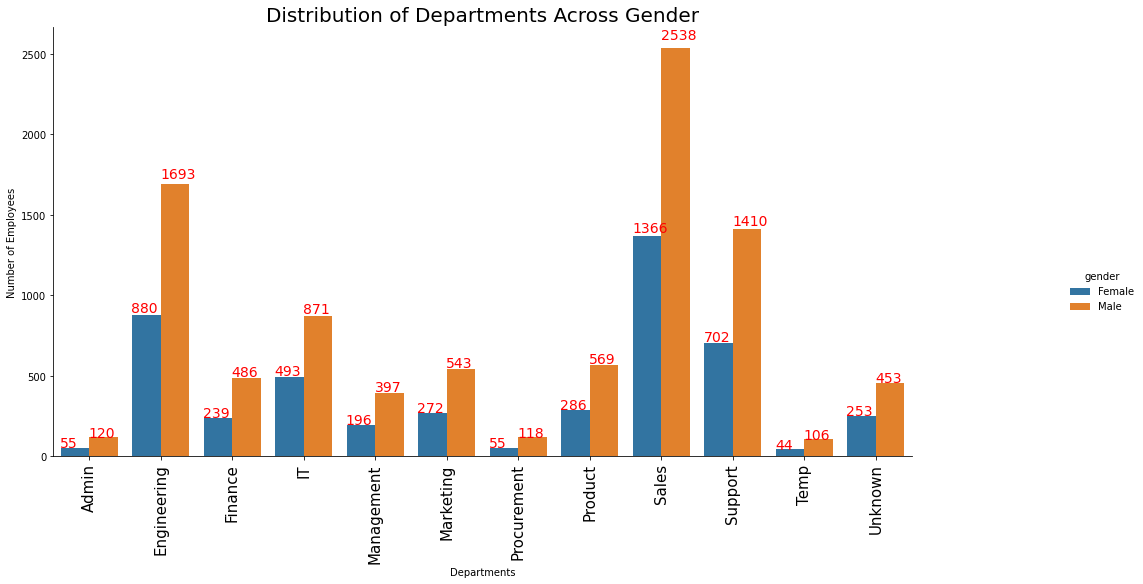

In [99]:
graph = sns.catplot(x='dept_name', y='employee_count', hue='gender', data=dept ,kind='bar',palette='tab10')
ax = graph.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='red', 
            rotation='horizontal', 
            size=14)
    
graph.set_axis_labels("Departments","Number of Employees")
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(18)
graph.fig.set_figheight(7)

plt.title("Distribution of Departments Across Gender",fontsize=20)
plt.show()

**It appears that ratio of male to female is almost same accross all departments.**

<a name = SectionQ4></a>
### **Q4.Distribution of Employees across departments vs salary**

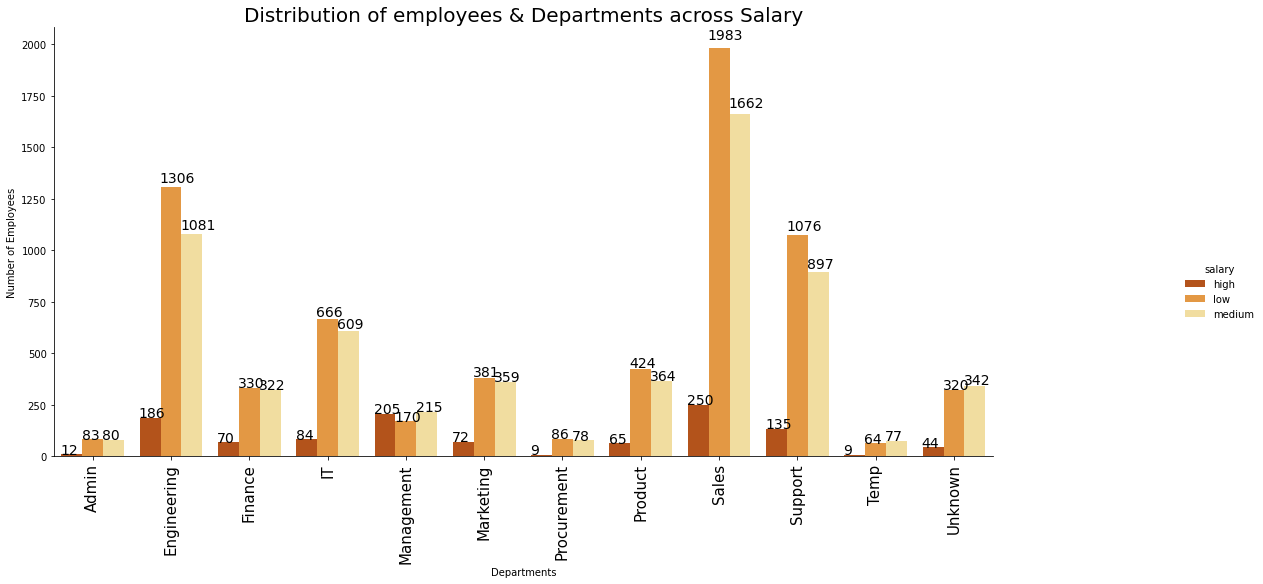

In [100]:
sal = pd.DataFrame(df.groupby(['salary','dept_name'])['employee_id'].nunique())
sal.reset_index(level = [0,1] , inplace = True)
sal.rename(columns= {'employee_id': 'employee_count'} , inplace = True)

graph = sns.catplot(x='dept_name', y='employee_count', hue='salary', data=sal ,kind='bar',palette='YlOrBr_r')
ax = graph.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size=14)
    
graph.set_axis_labels("Departments","Number of Employees")
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(7)

plt.title("Distribution of employees & Departments across Salary",fontsize=20)
plt.show()

<a name = SectionQ5></a>
### **Q5.Distribution of Employees across Age and Tenure**

In [101]:
df['age'].unique()

array([42, 23, 24, 51, 29, 36, 50, 22, 25, 44, 33, 52, 28, 43, 49, 30, 46,
       34, 47, 31, 40, 48, 38, 41, 54, 32, 39, 37, 27, 26, 53, 45, 57, 35,
       55, 56])

In [102]:
df['age_segments']='20-60'
df.loc[df[df['age']<=30].index,'age_segments']='20-30'
df.loc[df[(df['age']>=31) & (df['age']<=40)].index,'age_segments']='31-40'
df.loc[df[(df['age']>=41) & (df['age']<=50)].index,'age_segments']='41-50'
df.loc[df[(df['age']>=51) & (df['age']<=60)].index,'age_segments']='51-60'


In [103]:
df['age_segments'].value_counts()

20-30    7802
41-50    2656
31-40    2650
51-60    1037
Name: age_segments, dtype: int64

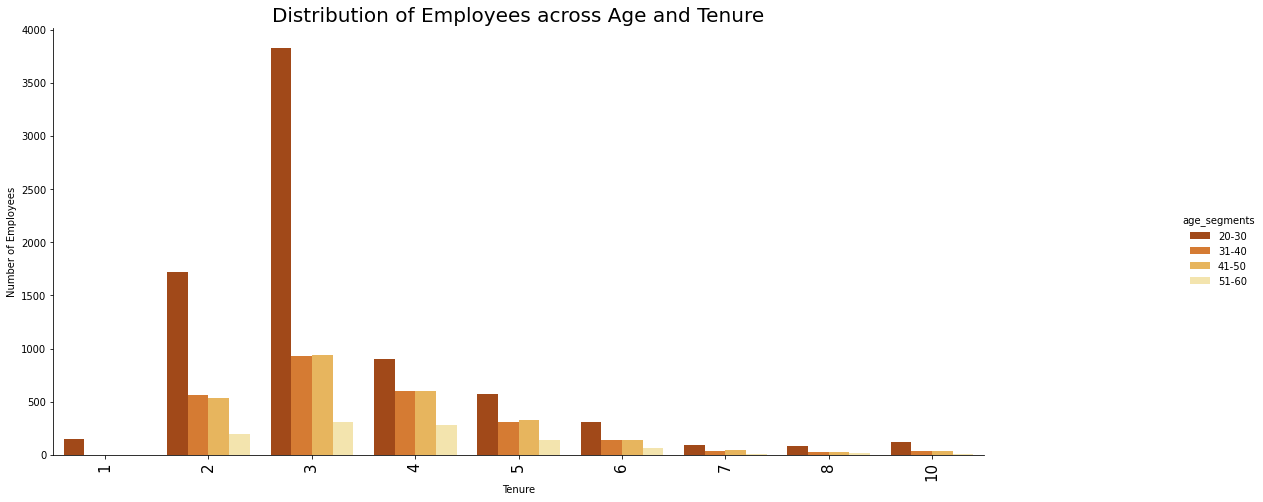

In [104]:
at = pd.DataFrame(df.groupby(['age_segments','tenure'])['employee_id'].nunique())
at.reset_index(level = [0,1] , inplace = True)
at.rename(columns= {'employee_id': 'employee_count'} , inplace = True)

graph = sns.catplot(x='tenure', y='employee_count', hue='age_segments', data=at ,kind='bar',palette='YlOrBr_r')
ax = graph.facet_axis(0, 0)

   
graph.set_axis_labels("Tenure","Number of Employees")
graph.set_xticklabels(fontsize=15,rotation=90)
graph.fig.set_figwidth(20)
graph.fig.set_figheight(7)
plt.title("Distribution of Employees across Age and Tenure",fontsize=20)
plt.show()

<a name = SectionQ6></a>
### **Q6.Distribution of employees across employee status vs Marital Status**

In [105]:
sta = pd.DataFrame(df.groupby(['marital_status','status'])['employee_id'].count())
sta.reset_index(level =[0,1], inplace = True)
sta.rename(columns = {'employee_id': 'employee_count'},inplace = True)
sta

,marital_status,status,employee_count
0,Married,Employed,5505
1,Married,Left,1414
2,Unmarried,Employed,5277
3,Unmarried,Left,1949


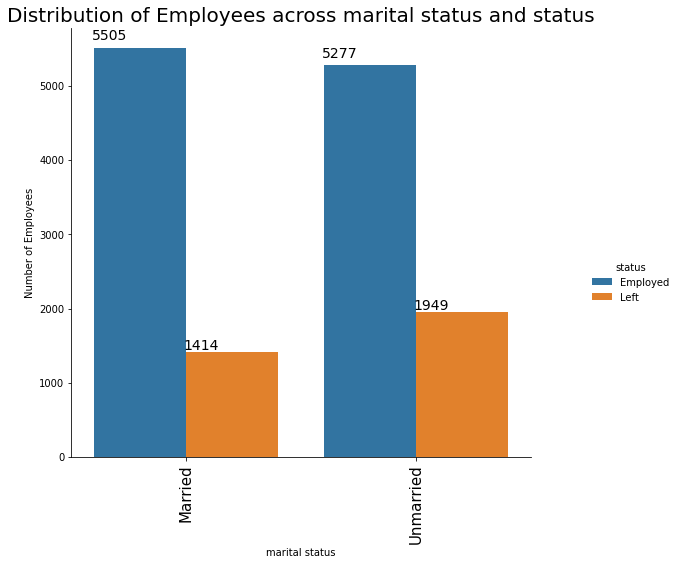

In [106]:
g = sns.catplot(x='marital_status' , y = 'employee_count' , hue = 'status' , data = sta, kind = 'bar', palette = 'tab10')
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{}'.format(int(p.get_height())),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size=14)

g.set_axis_labels("marital status","Number of Employees")
g.set_xticklabels(fontsize=15,rotation=90)
g.fig.set_figwidth(10)
g.fig.set_figheight(7)
plt.title("Distribution of Employees across marital status and status",fontsize=20)
plt.show()

The proportion of left employees are more in Unmarried category.

<a name = SectionQ7></a>
### **Q7.Distribution of Employees across gender vs salary**

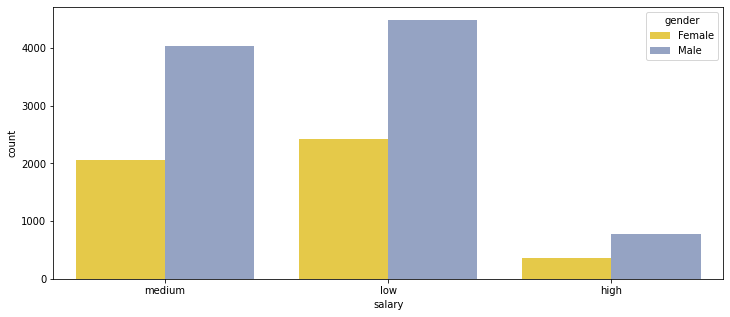

In [107]:
plt.figure(figsize = [12, 5])
sns.countplot(x='salary',data=df,hue='gender',palette='Set2_r')

plt.show()

In the company, the ratio of male to female is almost same accross the three salary categories.

<a name = SectionQ8></a>
### **Q8.Distribution of Employees across gender vs recently promoted**

Text(0.5, 0, 'Recently Promoted')

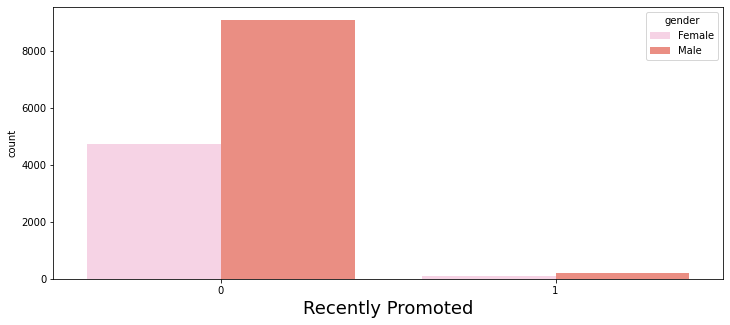

In [108]:
plt.figure(figsize = [12, 5])
sns.countplot(x='recently_promoted',data=df,hue='gender',palette='Set3_r')
plt.xlabel('Recently Promoted', fontsize = 18)

As the recently promoted employees are very less, any insight could not be infered.

<a name = SectionQ9></a>
### **Q9.Distribution of employee across tenure Vs status**

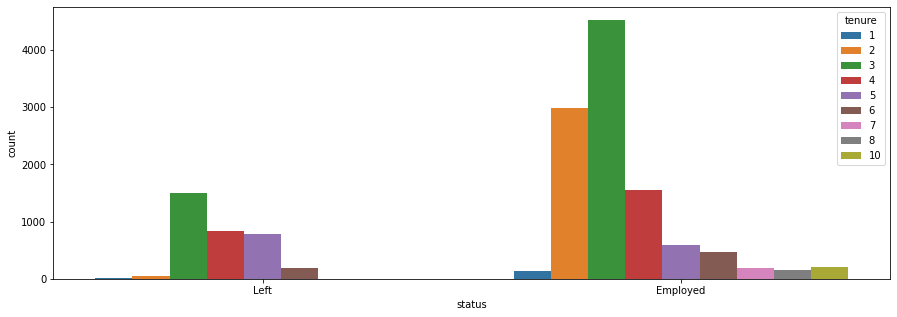

In [109]:
plt.figure(figsize=(15,5))
sns.countplot(x='status', hue='tenure', data = df)

Around 80% of employees have experience between 2-4 years.
After 3 to 5 years of working in the company, employees are leaving.

<a name = SectionQ10></a>
### **Q10.Impact of projects on status of the employee.**

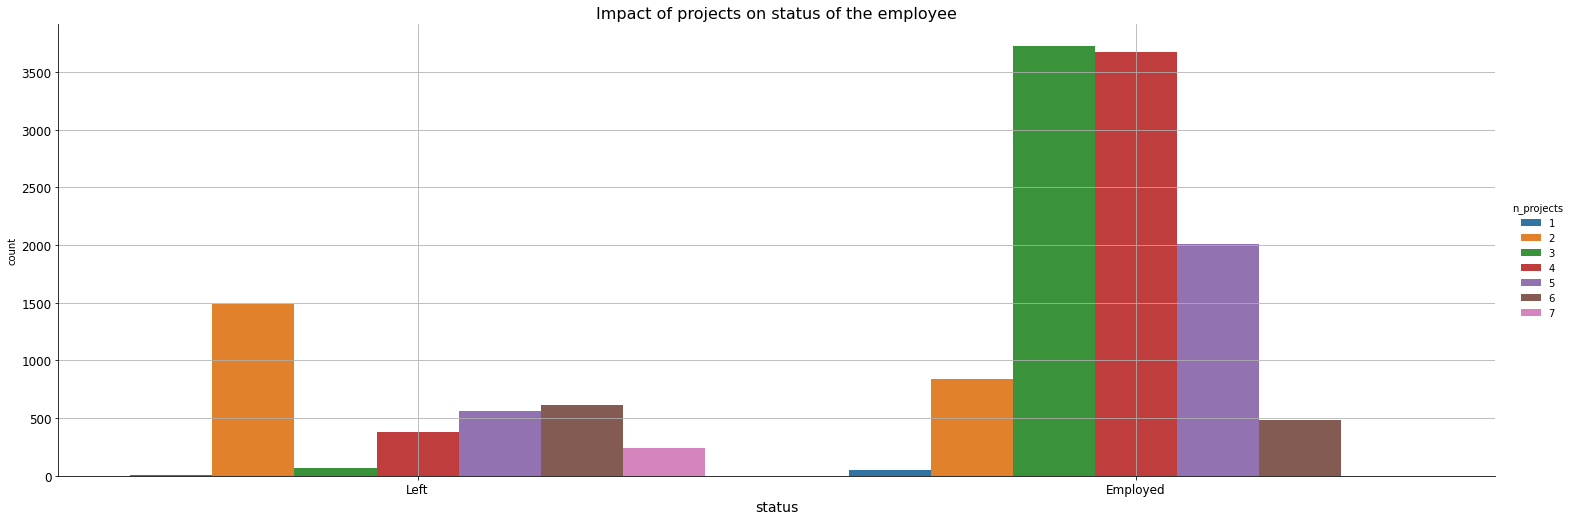

In [110]:
# Plot a catplot for Tenure comparing the n_projects
sns.catplot(x="status", data=df,kind='count', hue='n_projects', height=7, aspect=3)

# Add cosmetics 
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='status', size=14)
plt.title(label='Impact of projects on status of the employee', size=16)
# plt.grid(b=True)
plt.grid(visible=True)

# Display the plot
plt.show()

In [113]:
new_df = df.copy()

<a name = Section8></a>
#**8.One Hot Encoding and Label Encoding**

**Check the length of the categorical variable in dataset**

In [114]:
#Intialize empty list for categorical features and their length
cat_features = []
label_len = []

# Identify categorical features
for i in new_df.columns:
  if (df[i].dtype == object):
    cat_features.append(i)

# Identify labels length per leature
for i in cat_features:
  label_len.append(len(new_df[i].unique()))

# Display total categorical features
print('Total Categorical Features:', len(cat_features))

# Create and show categorical feature frame
cat_frame = pd.DataFrame(data = {'Length': label_len}, index=cat_features)
cat_frame

Total Categorical Features: 8


,Length
department,12
salary,3
status,2
gender,2
marital_status,2
dept_name,12
dept_head,12
age_segments,4


In [115]:
# new_df['salary'] = new_df['salary'].replace({'low':'0','medium':'1','high':'2'})
# new_df['gender'] = new_df['gender'].replace({'Male':'0','Female':'1'})
# new_df['marital_status']= new_df['marital_status'].replace({'Unmarried':'0','Married':'1'})
# new_df['status'] = new_df['status'].replace({'Left':'0','Employed':'1'})


In [116]:
#One-Hot Encoding
cat_feat=['salary','gender','marital_status']
new_df=pd.get_dummies(new_df,columns = cat_feat)

In [117]:
new_df.drop(['dept_name','dept_head','age_segments'], axis = 1, inplace = True)

In [118]:
new_df['department'].unique()

array(['D00-UN', 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT',
       'D00-AD', 'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'],
      dtype=object)

In [119]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['D00-UN', 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT',
       'D00-AD', 'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], ordered=True)
new_df['department'] = new_df['department'].astype(cat_type)

In [120]:
new_df['department'] = new_df['department'].cat.codes

In [121]:
new_df['status']= np.where(new_df['status']=='Left', 1, 0)

In [122]:
new_df.head(2)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,employee_id,age,salary_high,salary_low,salary_medium,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried
0,246.00000,0,0,0.86684,6,0,0.13442,1,4,124467,42,0,0,1,1,0,1,0
1,134.00000,0,0,0.55572,2,0,0.51104,1,3,112210,23,0,1,0,1,0,0,1


In [123]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_monthly_hrs           14145 non-null  float64
 1   department                14145 non-null  int8   
 2   filed_complaint           14145 non-null  int64  
 3   last_evaluation           14145 non-null  float64
 4   n_projects                14145 non-null  int64  
 5   recently_promoted         14145 non-null  int64  
 6   satisfaction              14145 non-null  float64
 7   status                    14145 non-null  int64  
 8   tenure                    14145 non-null  int64  
 9   employee_id               14145 non-null  int64  
 10  age                       14145 non-null  int64  
 11  salary_high               14145 non-null  uint8  
 12  salary_low                14145 non-null  uint8  
 13  salary_medium             14145 non-null  uint8  
 14  gender

<a name = Section8></a>
# **9.Conclusion From EDA**

- We have seen the impact of various factors such as **age, gender, marital_status, department, salary, tenure, n_projects, avg_monthly_hrs, satisfaction, last_evaluation on the employee status**.

- Company have more **Males employees(66.8%) compare to female employees(34.2%)across 11** departments.

- Around **70% of employees are in sales , engineering and support department**

- The ratio of male to female is almost same accross all departments.

- The proportion of left employees are more in Unmarried category.

- Around 80% of employees have experience between 2-4 years. After 3 to 5 years of working in the company, employees are leaving.

- More than 86% employee have last evaluation above 0.5.

- Most of the employees having low salary compare to other employees in the company . Around 80% of heatdcount having low salary. 


<a name = Section10></a>
# **10.Insights**

- Regular promotion should be given to keep employee Satisfied and to stay with company.

- Long tenure Employee should connect with other employee to address their concern.

- Regular Feedback should be given to employee to stay focused and interested in the company.

- There should be adequet employee connect to keep engement with employee.

- Regular Salaray Revision and maintain balanced working hours will help employee stay with company.

- Other opportunities such as training, extra carriculam activity, attend industry seminar should be made available adequately.

In [124]:
new_df.to_csv("employee_data_INSAID.csv", index=False)

**Using Above dataset we need to build a classification model to predict employee status in unseen data.** 